#               Signal Entropy

This code is related to the following section of [the paper](https://arxiv.org/abs/2403.17181):

## Section II:  INTRODUCTION TO SIGNALS
### E. Signal Entropy

For more details please refer to [the paper](https://arxiv.org/abs/2403.17181).

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import loadtxt
import scipy
from scipy import signal
from scipy.stats import entropy
from collections import Counter
import math
plt.rc('font',family='Times New Roman')
import warnings 
warnings.filterwarnings('ignore')

In [2]:
# load vibration signal:
random_vib_signal = loadtxt('vib.csv', delimiter=',') 
num_samples_vib = len(random_vib_signal) # number of datapoints in the signal.
fs_vib = 64000 # sampling rate
t_vib = np.arange(0.0, num_samples_vib, 1.0)/fs_vib # time vector.

#The vibration signal extracted from the PU dataset: https://mb.uni-paderborn.de/en/kat/main-research/datacenter/bearing-datacenter/data-sets-and-download

In [3]:
#Function to compute Shannon Entropy (SE):

def shannon_entropy(signal):
    # Count the frequency of each value in the signal
    count = Counter(signal)
    # Calculate the probabilities of each unique value
    probabilities = [frequency / len(signal) for frequency in count.values()]
    # Calculate the entropy
    entropy = -sum(probability * math.log(probability, 2) for probability in probabilities)
    return entropy

In [4]:
# Create sequare waveL

# Parameters
sample_length = num_samples_vib
seg_size = 100 # Segment length.
frequency = 5  # frequency of the sine wave in Hz
sampling_rate = fs_vib  # sampling rate in Hz

# Generate signal
sinusoidal_signal = np.sin(2 * np.pi * frequency * np.linspace(0, 1, sample_length, endpoint=False))
#sig = np.sin(2 * np.pi * t_vib)
square_wave = signal.square(2 * np.pi * 30 * t_vib, duty=(sinusoidal_signal + 1)/2)

In [5]:
# Function to compute Shannon entropy for each segment:
def compute_entropy(signal, seg_size):
    num_segs = len(signal) // seg_size
    entropy_list = []
    for i in range(num_segs):
        seg = signal[i*seg_size : (i+1)*seg_size]
        entropy_list.append(shannon_entropy(seg))
    return entropy_list

In [6]:
# Compute SE:

entropy_random_signal = compute_entropy(random_vib_signal, seg_size)
entropy_square_wave = compute_entropy(square_wave, seg_size)

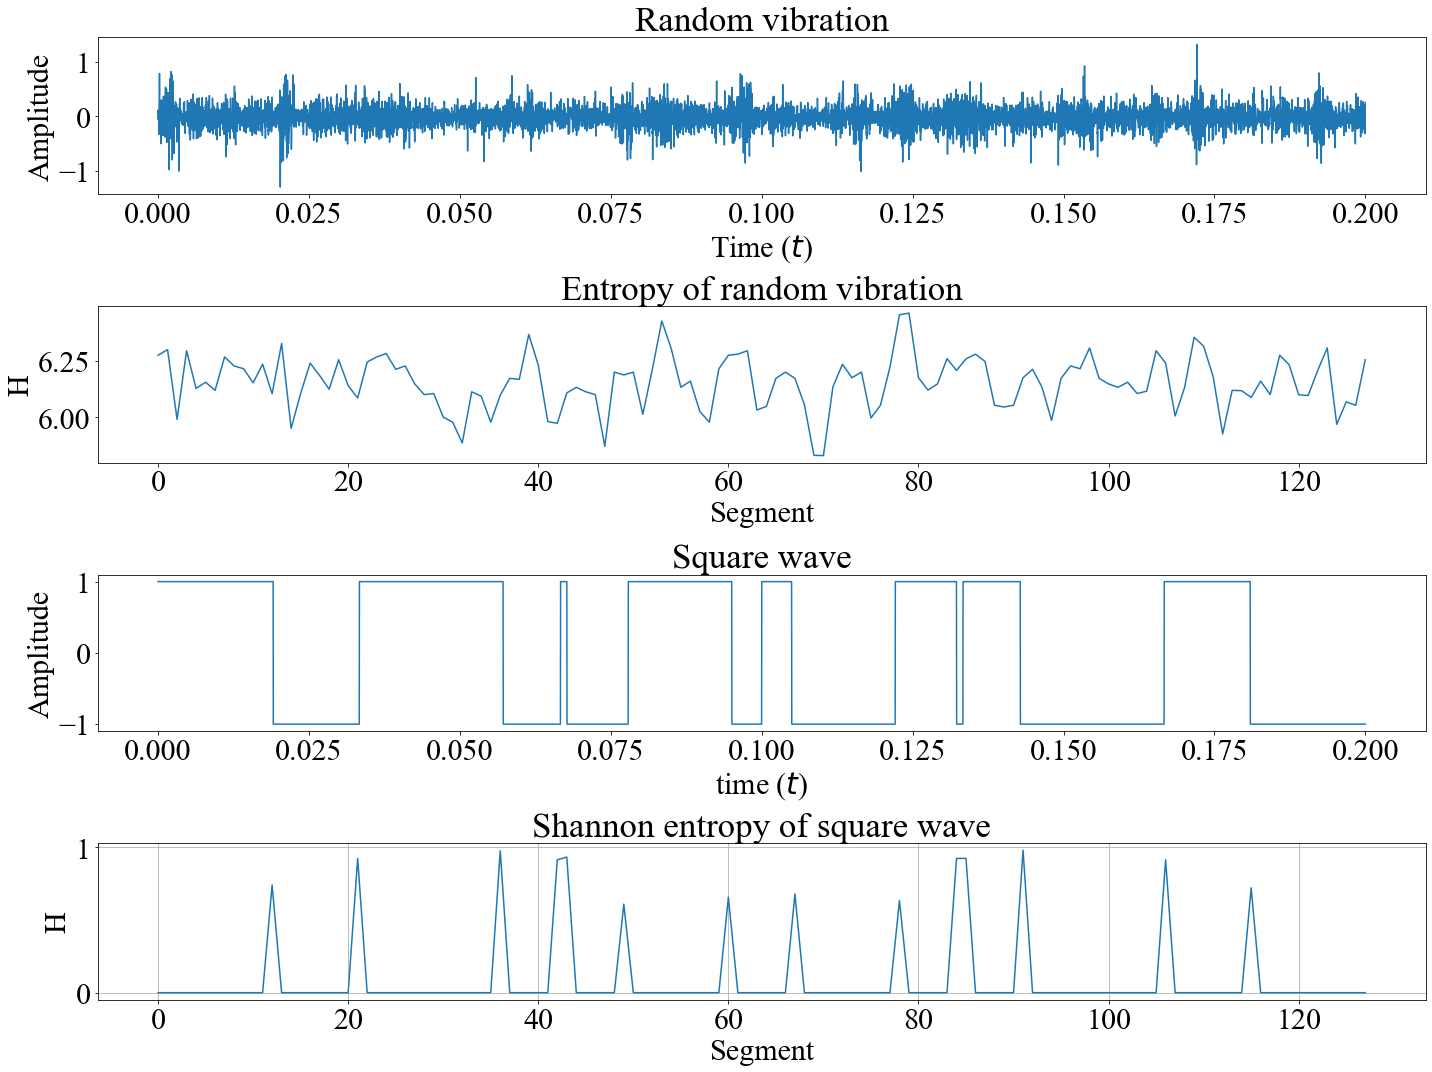

In [7]:
# Plotting:

plt.figure(figsize=(20, 15))
plt.subplot(4, 1, 1)
plt.plot(t_vib, random_vib_signal)
plt.title('Random vibration',  fontsize = 35)
plt.xlabel('Time ($t$)',  fontsize = 30)
plt.ylabel('Amplitude',  fontsize = 30)
plt.tick_params(axis='both', which='major', labelsize= 30)
plt.tick_params(axis='both', which='minor', labelsize= 30)

plt.subplot(4, 1, 2)
plt.plot(entropy_random_signal)
plt.title('Entropy of random vibration',  fontsize = 35)
plt.xlabel('Segment',  fontsize = 30)
plt.ylabel('H',  fontsize = 30)
plt.tick_params(axis='both', which='major', labelsize=30)
plt.tick_params(axis='both', which='minor', labelsize= 30)



plt.subplot(4, 1, 3)
plt.plot(t_vib, square_wave)
plt.title('Square wave',  fontsize = 35)
plt.xlabel('time ($t$)',  fontsize = 30)
plt.ylabel('Amplitude',  fontsize = 30)
plt.tick_params(axis='both', which='major', labelsize=30)
plt.tick_params(axis='both', which='minor', labelsize= 30)

plt.subplot(4, 1, 4)
plt.plot(entropy_square_wave)
plt.title('Shannon entropy of square wave',  fontsize = 35)
plt.xlabel('Segment',  fontsize = 30)
plt.ylabel('H',  fontsize = 30)
plt.tick_params(axis='both', which='major', labelsize=30)
plt.tick_params(axis='both', which='minor', labelsize= 30)

plt.grid(True)
plt.tight_layout()
plt.show()
